<a href="https://colab.research.google.com/github/wilszon/ProyectoIA/blob/main/PreprocesamientoDesercionIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
path = kagglehub.dataset_download("abdullah0a/student-dropout-analysis-and-prediction-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-dropout-analysis-and-prediction-dataset


In [ ]:
import kagglehub
import pandas as pd
import os

for filename in os.listdir(path):
    if filename.endswith(".csv"):
        filepath = os.path.join(path, filename)
        break

df = pd.read_csv(filepath)
df

,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,False
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,False
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,True
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,False


In [ ]:
df.shape

(649, 34)

In [ ]:
#Resumen del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   School                       649 non-null    object
 1   Gender                       649 non-null    object
 2   Age                          649 non-null    int64 
 3   Address                      649 non-null    object
 4   Family_Size                  649 non-null    object
 5   Parental_Status              649 non-null    object
 6   Mother_Education             649 non-null    int64 
 7   Father_Education             649 non-null    int64 
 8   Mother_Job                   649 non-null    object
 9   Father_Job                   649 non-null    object
 10  Reason_for_Choosing_School   649 non-null    object
 11  Guardian                     649 non-null    object
 12  Travel_Time                  649 non-null    int64 
 13  Study_Time                   649 no

In [ ]:
df.describe()

,Age,Mother_Education,Father_Education,Travel_Time,Study_Time,Number_of_Failures,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [ ]:
#Verificacion de valores nulos

df.isnull().sum()

,0
School,0
Gender,0
Age,0
Address,0
Family_Size,0
Parental_Status,0
Mother_Education,0
Father_Education,0
Mother_Job,0
Father_Job,0


#Convertir variables categóricas a numéricas

In [ ]:
for column in df.columns:
    if df[column].dtype == object:
        df[column] = df[column].replace({'yes': 1, 'no': 0})

df

<ipython-input-63-6985bc0725f9>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({'yes': 1, 'no': 0})


,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,...,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,False
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,False
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,True
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,False


In [ ]:
df.School

,School
0,GP
1,GP
2,GP
3,GP
4,GP
...,...
644,MS
645,MS
646,MS
647,MS


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd # Import pandas

# Suponiendo que 'Dropped_Out' es tu variable objetivo y el resto son predictores
X = df.drop('Dropped_Out', axis=1)
y = df['Dropped_Out']

# Identificar columnas categóricas (tipo 'object')
categorical_cols = X.select_dtypes(include='object').columns

# Aplicar one-hot encoding a las columnas categóricas
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True) # drop_first=True para evitar multicolinealidad

# Selecciona las k mejores características usando ANOVA F-value
selector = SelectKBest(f_classif, k=7) # k es el número de características que quieres seleccionar
X_new = selector.fit_transform(X_encoded, y) # Usar el DataFrame codificado

# Obtén los índices de las características seleccionadas
selected_indices = selector.get_support(indices=True)

# Obtén los nombres de las características seleccionadas
selected_features = X_encoded.columns[selected_indices] # Obtener nombres del DataFrame codificado

# Crea un nuevo DataFrame con las características seleccionadas
df_selected = pd.DataFrame(X_new, columns=selected_features)
df_selected['Dropped_Out'] = y.reset_index(drop=True) # Agrega de nuevo la columna objetivo y resetea el índice para que coincida

print(df_selected.head())
print("Características seleccionadas:", selected_features)


   Study_Time  Number_of_Failures  Wants_Higher_Education  Grade_1  Grade_2  \
0           2                   0                       1        0       11   
1           2                   0                       1        9       11   
2           2                   0                       1       12       13   
3           3                   0                       1       14       14   
4           2                   0                       1       11       13   

   Final_Grade  School_MS  Dropped_Out  
0           11          0        False  
1           11          0        False  
2           12          0        False  
3           14          0        False  
4           13          0        False  
Características seleccionadas: Index(['Study_Time', 'Number_of_Failures', 'Wants_Higher_Education', 'Grade_1',
       'Grade_2', 'Final_Grade', 'School_MS'],
      dtype='object')


In [ ]:
# prompt: deja solo las caracteristicas seleccionadas

# Ahora df solo contiene las características seleccionadas y la columna objetivo
df = df_selected
df["Dropped_Out"] = df["Dropped_Out"].astype(int)
df

,Study_Time,Number_of_Failures,Wants_Higher_Education,Grade_1,Grade_2,Final_Grade,School_MS,Dropped_Out
0,2,0,1,0,11,11,0,0
1,2,0,1,9,11,11,0,0
2,2,0,1,12,13,12,0,0
3,3,0,1,14,14,14,0,0
4,2,0,1,11,13,13,0,0
...,...,...,...,...,...,...,...,...
644,3,1,1,10,11,10,1,0
645,2,0,1,15,15,16,1,0
646,2,0,1,11,12,9,1,1
647,1,0,1,10,10,10,1,0


In [ ]:
# prompt: hazle drop a school ms

df = df.drop('School_MS', axis=1)
df

,Study_Time,Number_of_Failures,Wants_Higher_Education,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,2,0,1,0,11,11,0
1,2,0,1,9,11,11,0
2,2,0,1,12,13,12,0
3,3,0,1,14,14,14,0
4,2,0,1,11,13,13,0
...,...,...,...,...,...,...,...
644,3,1,1,10,11,10,0
645,2,0,1,15,15,16,0
646,2,0,1,11,12,9,1
647,1,0,1,10,10,10,0


In [ ]:
df = df.drop('Final_Grade', axis=1)
df

,Study_Time,Number_of_Failures,Wants_Higher_Education,Grade_1,Grade_2,Dropped_Out
0,2,0,1,0,11,0
1,2,0,1,9,11,0
2,2,0,1,12,13,0
3,3,0,1,14,14,0
4,2,0,1,11,13,0
...,...,...,...,...,...,...
644,3,1,1,10,11,0
645,2,0,1,15,15,0
646,2,0,1,11,12,1
647,1,0,1,10,10,0


# Normalizar

In [ ]:


from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()
# Aplicar el escalador a las características (excluyendo la columna objetivo)
# Aseguramos que solo escalamos las columnas numéricas si hay columnas no numéricas restantes
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
# Excluimos la columna objetivo si está presente en las columnas numéricas
if 'Dropped_Out' in numerical_cols:
    numerical_cols = numerical_cols.drop('Dropped_Out')

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("DataFrame después de la normalización:")
print(df.head())

DataFrame después de la normalización:
   Study_Time  Number_of_Failures  Wants_Higher_Education   Grade_1   Grade_2  \
0    0.083653           -0.374305                0.344914 -4.155470 -0.195820   
1    0.083653           -0.374305                0.344914 -0.874570 -0.195820   
2    0.083653           -0.374305                0.344914  0.219064  0.491137   
3    1.290114           -0.374305                0.344914  0.948153  0.834615   
4    0.083653           -0.374305                0.344914 -0.145481  0.491137   

   Dropped_Out  
0            0  
1            0  
2            0  
3            0  
4            0  


In [ ]:
df

,Study_Time,Number_of_Failures,Wants_Higher_Education,Grade_1,Grade_2,Dropped_Out
0,0.083653,-0.374305,0.344914,-4.155470,-0.195820,0
1,0.083653,-0.374305,0.344914,-0.874570,-0.195820,0
2,0.083653,-0.374305,0.344914,0.219064,0.491137,0
3,1.290114,-0.374305,0.344914,0.948153,0.834615,0
4,0.083653,-0.374305,0.344914,-0.145481,0.491137,0
...,...,...,...,...,...,...
644,1.290114,1.312667,0.344914,-0.510025,-0.195820,0
645,0.083653,-0.374305,0.344914,1.312697,1.178093,0
646,0.083653,-0.374305,0.344914,-0.145481,0.147659,1
647,-1.122808,-0.374305,0.344914,-0.510025,-0.539298,0


In [ ]:
#Guardamos el scaler

import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# Balanceo de datos

In [ ]:
from sklearn.model_selection import train_test_split

# Definir las características y la etiqueta
X = df.drop('Dropped_Out', axis=1)
y = df['Dropped_Out']
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (519, 5)
Tamaño del conjunto de prueba: (130, 5)


In [ ]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para balancear el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"Tamaño del conjunto de entrenamiento balanceado: {X_train_balanced.shape}")
print(f"Conteo de clases en el conjunto de entrenamiento balanceado: {y_train_balanced.value_counts()}")


Tamaño del conjunto de entrenamiento balanceado: (878, 5)
Conteo de clases en el conjunto de entrenamiento balanceado: Dropped_Out
0    439
1    439
Name: count, dtype: int64


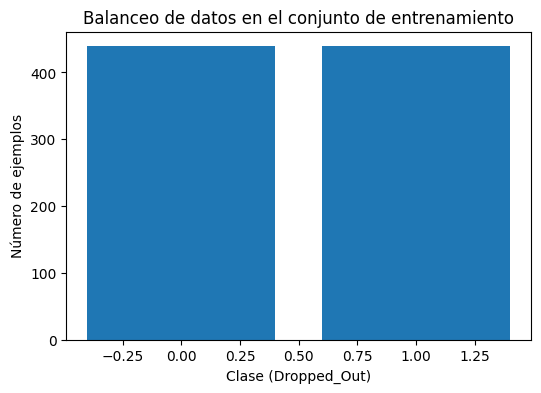

In [ ]:
class_counts = y_train_balanced.value_counts()

#Grafico de barras para visualizar el balanceo de datos
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Clase (Dropped_Out)")
plt.ylabel("Número de ejemplos")
plt.title("Balanceo de datos en el conjunto de entrenamiento")
plt.show()


# Entrenamiento del Modelo Naive Bayes:

In [ ]:
#Importar el modelo Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Crear el modelo Naive Bayes
nb_model = GaussianNB()

# Entrenar el modelo
nb_model.fit(X_train_balanced, y_train_balanced)

GaussianNB()

#Realizar predicciones:

In [ ]:
X_test.shape

(130, 5)

In [ ]:
#Predicciones
y_pred_nb = nb_model.predict(X_test)
print("Predicciones de los estudiantes en y_test")
y_pred_nb


Predicciones de los estudiantes en y_test


array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#Valores Reales
print("Valores reales de y_test")
y_test.to_numpy()

Valores reales de y_test


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#Evaluacion de el modelo

In [ ]:
# Evaluar el modelo
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

#Calcular exactitud
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Precisión del modelo Naive Bayes: {accuracy_nb * 100:.2f}%")

# Calcular la matriz de confusión
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Matriz de Confusión Naive Bayes:\n", conf_matrix_nb)

Precisión del modelo Naive Bayes: 84.62%
Matriz de Confusión Naive Bayes:
 [[92 18]
 [ 2 18]]


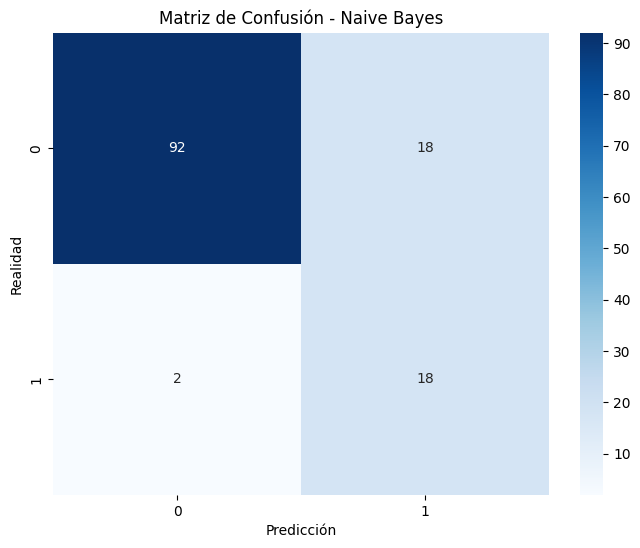

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_nb)

# Crear el mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

# Etiquetas y título
plt.title('Matriz de Confusión - Naive Bayes')
plt.xlabel('Predicción')
plt.ylabel('Realidad')

# Mostrar el gráfico
plt.show()


# KNN

Exactitud KNN: 0.8615384615384616
Matriz de Confusión KNN:
 [[95 15]
 [ 3 17]]


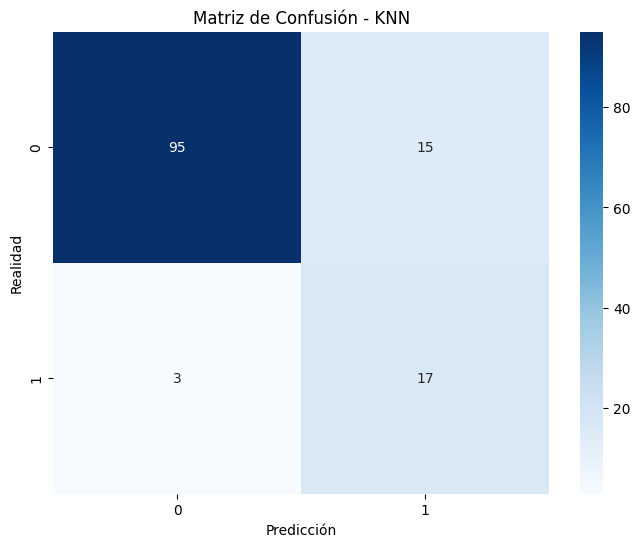

In [ ]:
#Importar
from sklearn.neighbors import KNeighborsClassifier

# Crear el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn_model.fit(X_train_balanced, y_train_balanced)

# Realizar predicciones
y_pred_knn = knn_model.predict(X_test)

# Evaluar el modelo
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Exactitud KNN:", accuracy_knn)

# Calcular la matriz de confusión
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Matriz de Confusión KNN:\n", conf_matrix_knn)

# Crear el mapa de calor para la matriz de confusión de KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusión - KNN')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# SVC

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale

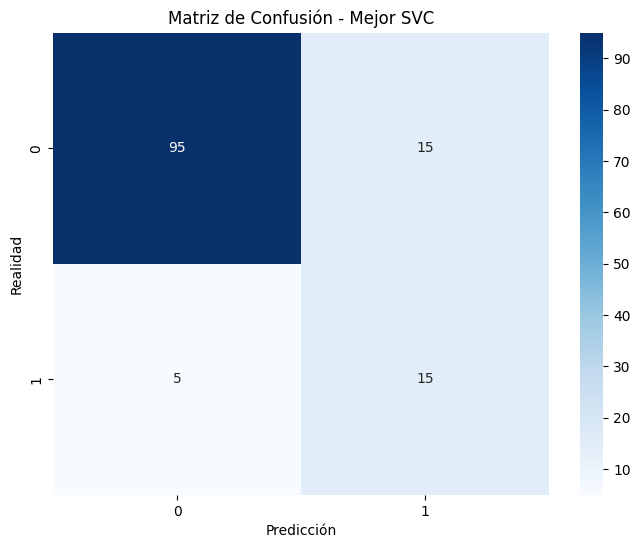

In [ ]:
# prompt: hazme el modelo con svc y haz gridsearch

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Crear el modelo SVC
svc_model = SVC()

# Definir la grilla de parámetros para GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(svc_model, param_grid, refit=True, verbose=2, cv=5, scoring='accuracy')

# Realizar la búsqueda en grilla con los datos de entrenamiento balanceados
grid_search.fit(X_train_balanced, y_train_balanced)

# Imprimir los mejores parámetros y el mejor score
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor puntuación de validación cruzada:", grid_search.best_score_)

# Obtener el mejor modelo
best_svc_model = grid_search.best_estimator_

# Realizar predicciones con el mejor modelo en el conjunto de prueba
y_pred_svc = best_svc_model.predict(X_test)

# Evaluar el mejor modelo
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Precisión del mejor modelo SVC en el conjunto de prueba: {accuracy_svc * 100:.2f}%")

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación del mejor modelo SVC:")
print(classification_report(y_test, y_pred_svc))

# Calcular y mostrar la matriz de confusión
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print("Matriz de Confusión SVC:\n", conf_matrix_svc)

# Crear el mapa de calor para la matriz de confusión de SVC
cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusión - Mejor SVC')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()


Arboles de decision

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV

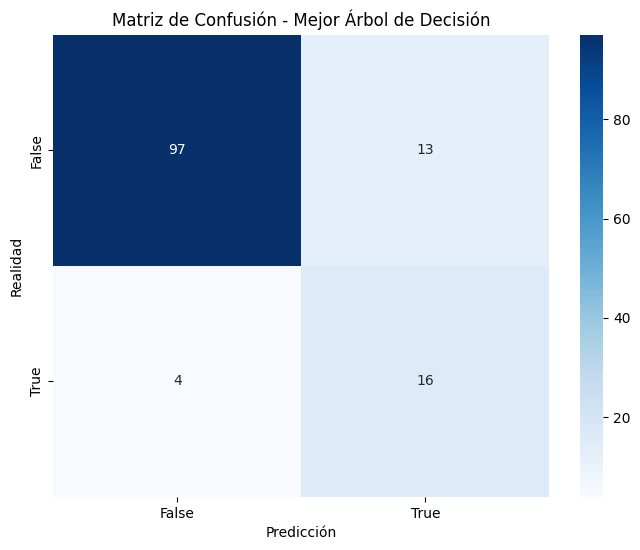

In [ ]:
# prompt: Entreneme con arboles de decision y haciendo gridsearch

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Crear el modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)

# Definir la grilla de parámetros para GridSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el objeto GridSearchCV
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, refit=True, verbose=2, cv=5, scoring='accuracy')

# Realizar la búsqueda en grilla con los datos de entrenamiento balanceados
grid_search_dt.fit(X_train_balanced, y_train_balanced)

# Imprimir los mejores parámetros y el mejor score
print("Mejores parámetros encontrados (Árbol de Decisión):", grid_search_dt.best_params_)
print("Mejor puntuación de validación cruzada (Árbol de Decisión):", grid_search_dt.best_score_)

# Obtener el mejor modelo de Árbol de Decisión
best_dt_model = grid_search_dt.best_estimator_

# Realizar predicciones con el mejor modelo en el conjunto de prueba
y_pred_dt = best_dt_model.predict(X_test)

# Evaluar el mejor modelo de Árbol de Decisión
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Precisión del mejor modelo de Árbol de Decisión en el conjunto de prueba: {accuracy_dt * 100:.2f}%")

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación del mejor modelo de Árbol de Decisión:")
print(classification_report(y_test, y_pred_dt))

# Calcular y mostrar la matriz de confusión
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Matriz de Confusión Árbol de Decisión:\n", conf_matrix_dt)

# Crear el mapa de calor para la matriz de confusión del Árbol de Decisión
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusión - Mejor Árbol de Decisión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()


Random forest

In [ ]:
# prompt: ahora entrename con random forest y si es posible haz grid search

from sklearn.ensemble import RandomForestClassifier

# Crear el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Definir la grilla de parámetros para GridSearchCV para Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'criterion': ['gini', 'entropy'], # Criterio de división
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4]      # Número mínimo de muestras requeridas para ser una hoja
}

# Crear el objeto GridSearchCV para Random Forest
# cv=5 indica validación cruzada con 5 folds
# scoring='accuracy' es la métrica a optimizar
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, refit=True, verbose=2, cv=5, scoring='accuracy')

# Realizar la búsqueda en grilla con los datos de entrenamiento balanceados
print("Iniciando Grid Search para Random Forest...")
grid_search_rf.fit(X_train_balanced, y_train_balanced)
print("Grid Search para Random Forest completado.")

# Imprimir los mejores parámetros y el mejor score
print("\nMejores parámetros encontrados (Random Forest):", grid_search_rf.best_params_)
print("Mejor puntuación de validación cruzada (Random Forest):", grid_search_rf.best_score_)

# Obtener el mejor modelo de Random Forest
best_rf_model = grid_search_rf.best_estimator_

# Realizar predicciones con el mejor modelo en el conjunto de prueba
y_pred_rf = best_rf_model.predict(X_test)

# Evaluar el mejor modelo de Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nPrecisión del mejor modelo de Random Forest en el conjunto de prueba: {accuracy_rf * 100:.2f}%")

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación del mejor modelo de Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Calcular y mostrar la matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nMatriz de Confusión Random Forest:\n", conf_matrix_rf)

# Crear el mapa de calor para la matriz de confusión del Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusión - Mejor Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

Iniciando Grid Search para Random Forest...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1

KeyboardInterrupt: 

#RegressionLogistica

In [ ]:
# prompt: entrename con regresion logistica y si es posible haz grid search pero solo muestrame a lo ultimo el mejor modelo y la precision, no me muestres uno por uno

from sklearn.linear_model import LogisticRegression

# Crear el modelo de Regresión Logística
log_reg_model = LogisticRegression(solver='liblinear', random_state=42) # Usamos 'liblinear' para conjuntos de datos pequeños

# Definir la grilla de parámetros para GridSearchCV para Regresión Logística
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Parámetro de regularización
    'penalty': ['l1', 'l2']            # Tipo de regularización
}

# Crear el objeto GridSearchCV para Regresión Logística
grid_search_lr = GridSearchCV(log_reg_model, param_grid_lr, refit=True, verbose=0, cv=5, scoring='accuracy') # verbose=0 para no mostrar la búsqueda

# Realizar la búsqueda en grilla con los datos de entrenamiento balanceados
print("Iniciando Grid Search para Regresión Logística...")
grid_search_lr.fit(X_train_balanced, y_train_balanced)
print("Grid Search para Regresión Logística completado.")

# Obtener el mejor modelo de Regresión Logística
best_lr_model = grid_search_lr.best_estimator_

# Realizar predicciones con el mejor modelo en el conjunto de prueba
y_pred_lr = best_lr_model.predict(X_test)

# Evaluar el mejor modelo de Regresión Logística
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Imprimir los resultados del mejor modelo
print("\nResultados del Mejor Modelo de Regresión Logística:")
print("Mejores parámetros encontrados:", grid_search_lr.best_params_)
print(f"Precisión en el conjunto de prueba: {accuracy_lr * 100:.2f}%")

#Xgboost

Iniciando entrenamiento del modelo XGBoost...
Entrenamiento del modelo XGBoost completado.

Precisión del modelo XGBoost en el conjunto de prueba: 88.46%

Reporte de Clasificación del modelo XGBoost:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       110
           1       0.59      0.85      0.69        20

    accuracy                           0.88       130
   macro avg       0.78      0.87      0.81       130
weighted avg       0.91      0.88      0.89       130


Matriz de Confusión XGBoost:
 [[98 12]
 [ 3 17]]


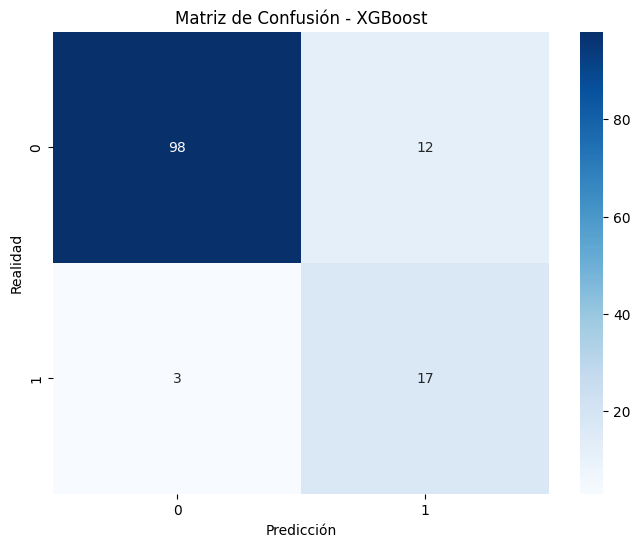

In [ ]:
# prompt: entrename el modelo con Xgboost sin gridsearch

!pip install xgboost

import xgboost as xgb

# Crear el modelo XGBoost
# Puedes ajustar los parámetros si lo deseas, pero sin GridSearch usamos valores por defecto o conocidos buenos.
# Algunos parámetros comunes son:
# learning_rate: Tasa de aprendizaje
# n_estimators: Número de árboles
# max_depth: Profundidad máxima de los árboles
# subsample: Fracción de muestras usadas para entrenar cada árbol
# colsample_bytree: Fracción de características usadas para entrenar cada árbol
# objective: Función objetivo (binary:logistic para clasificación binaria)
# eval_metric: Métrica de evaluación (logloss, auc, error, etc.)

# Usamos un modelo simple para empezar
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, eval_metric='logloss')

# Entrenar el modelo con los datos de entrenamiento balanceados
print("Iniciando entrenamiento del modelo XGBoost...")
xgb_model.fit(X_train_balanced, y_train_balanced)
print("Entrenamiento del modelo XGBoost completado.")

# Realizar predicciones en el conjunto de prueba
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el modelo
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"\nPrecisión del modelo XGBoost en el conjunto de prueba: {accuracy_xgb * 100:.2f}%")

# Mostrar el reporte de clasificación
print("\nReporte de Clasificación del modelo XGBoost:")
print(classification_report(y_test, y_pred_xgb))

# Calcular y mostrar la matriz de confusión
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nMatriz de Confusión XGBoost:\n", conf_matrix_xgb)

# Crear el mapa de calor para la matriz de confusión de XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusión - XGBoost')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

#Guardar modelo

In [ ]:
# prompt: guardar el modelo xgboost

joblib.dump(xgb_model, 'xgboost_model.pkl')
print("Modelo XGBoost guardado como 'xgboost_model.pkl'")


Modelo XGBoost guardado como 'xgboost_model.pkl'
